# Balancing Cart Pole Challenge with DQN

#### Welcome to the Balancing Cart Pole Challenge! In this file, you'll delve into the fascinating world of deep reinforcement learning using the Deep Q-Network (DQN) algorithm. Your mission is to train an agent to balance a pole attached to a moving cart by applying forces strategically. The challenge lies in mastering the delicate balance between exploration and exploitation to achieve optimal pole balancing.

#### Embark on the journey of fine-tuning hyperparameters, experimenting with neural network architectures, and optimizing your DQN to conquer the task of keeping the pole upright for as long as possible. Enjoy the thrill of mastering the art of reinforcement learning in this dynamic and engaging challenge!

In [1]:
from utils import ReplayBuffer, greedy_action, epsilon_greedy, update_target, loss, DQN, training, train_policy_network, unoptimised_training, create_optuna_study

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import math
import numpy as np
import optuna

import gym
import matplotlib.pyplot as plt

# Question 1: Tuning the DQN

## 1.2: Learning curve

Training a DQN is not always a deterministic process and you may get potentially large variation
between training runs. Replicate the DQN training 10 times and produce a plot of the mean return
per episode with the standard deviation you have observed over the replications

### Unoptimised Training

In [2]:
# Train the unoptimised model
runs_results_unoptimised = unoptimised_training()

Starting run 1 of 10


c:\Users\Pierre\OneDrive - Imperial College London\YEAR 4-PIERRELAPTOP\Reinforcement Learning\Tutorials\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episo

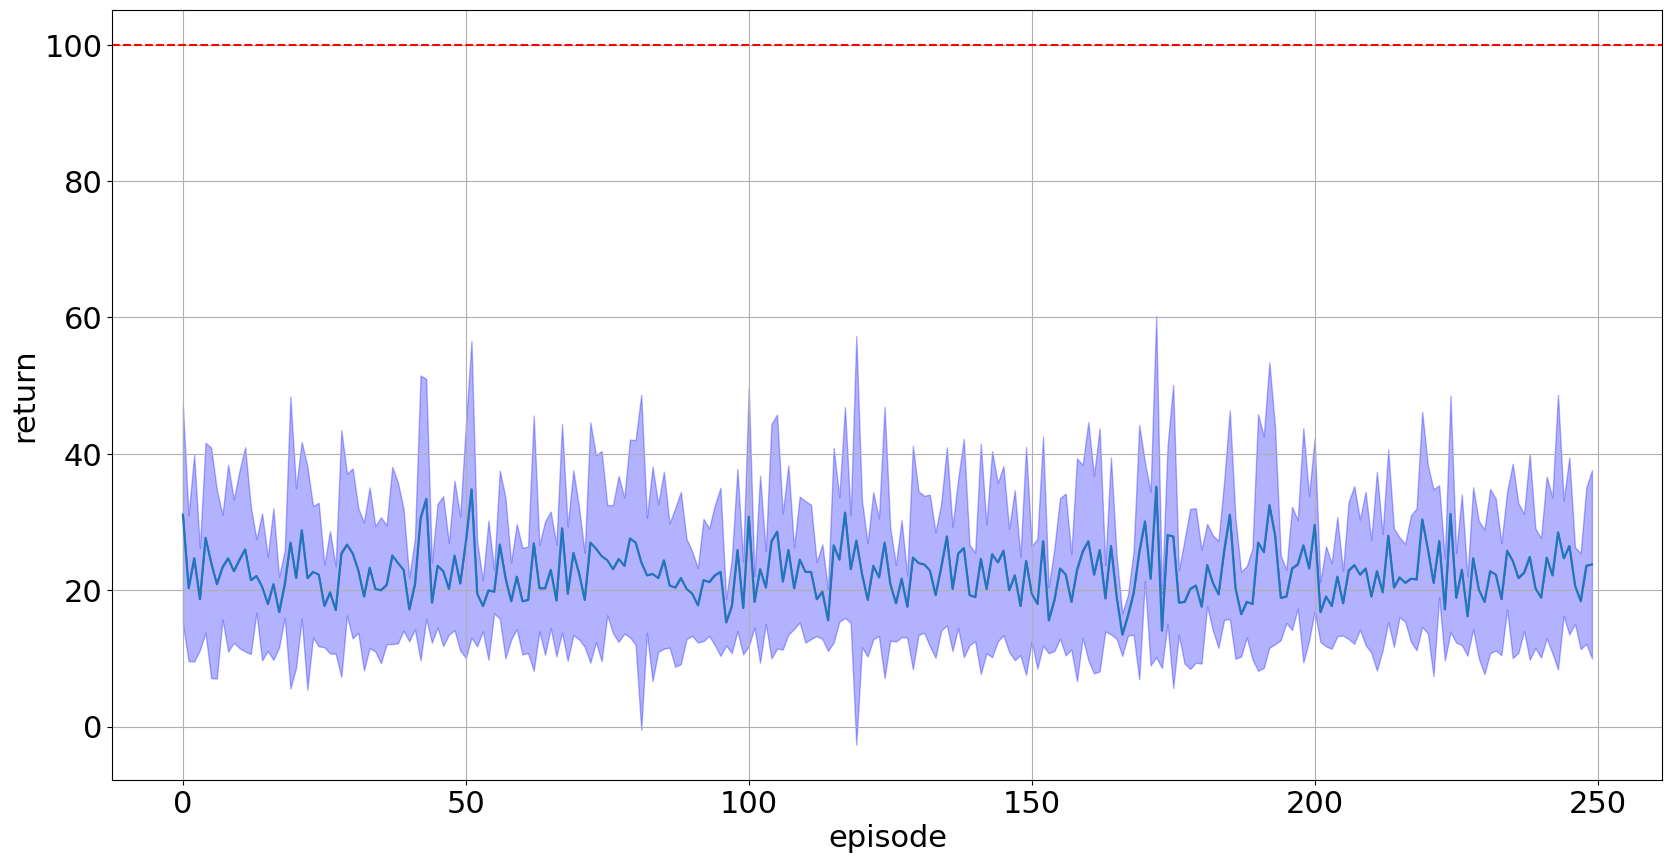

In [3]:
# Plotting the learning curve for the unoptimised model

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
 
results = torch.tensor(runs_results_unoptimised[0:250])
means = results.float().mean(0)
stds = results.float().std(0)

plt.plot(torch.arange(250), means)
plt.ylabel("return")
plt.xlabel("episode")
plt.fill_between(np.arange(250), means, means+stds, alpha=0.3, color='b')
plt.fill_between(np.arange(250), means, means-stds, alpha=0.3, color='b')
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.grid()
plt.show()

## Hyperparameter Search Using Optuna

In [3]:
create_optuna_study(1)

[I 2023-11-21 17:24:51,675] A new study created in memory with name: CartPole-v1


Starting run 1 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
epi

[I 2023-11-21 17:26:01,602] Trial 0 finished with value: 250.0 and parameters: {'EPSILON': 0.8402586760749694, 'EPSILON_DECAY': 0.9, 'LEARNING_RATE': 0.08213946271015067, 'NN_NETWORK': [4, 18, 2], 'ACTIVATION_FUNCTION': <function sigmoid at 0x000001BD18391EE0>, 'OPTIMIZER': 'Adam', 'REPLAY_BUFFER_SIZE': 15000, 'BATCH_SIZE': 20, 'UPDATE FREQUENCY': 10}. Best is trial 0 with value: 250.0.


episode  250 / 250
Complete All Runs
Best trial:
Threshold_value: %s 250.0
Params: 
%s: %s EPSILON 0.8402586760749694
%s: %s EPSILON_DECAY 0.9
%s: %s LEARNING_RATE 0.08213946271015067
%s: %s NN_NETWORK [4, 18, 2]
%s: %s ACTIVATION_FUNCTION <function sigmoid at 0x000001BD18391EE0>
%s: %s OPTIMIZER Adam
%s: %s REPLAY_BUFFER_SIZE 15000
%s: %s BATCH_SIZE 20
%s: %s UPDATE FREQUENCY 10


### Choosen Parameters to train model

In [21]:
hyperparameters = {
    'NUM_RUNS': 10,
    'EPISODES': 250,
    'EPSILON': 0.74,
    'EPSILON_DECAY': 0.99,
    'LEARNING_RATE': 0.00474,
    'NN_NETWORK': [4, 128, 64, 2],
    'ACTIVATION_FUNCTION': F.leaky_relu,
    'OPTIMIZER': 'Adam',
    'REPLAY_BUFFER_SIZE': 10000,
    'BATCH_SIZE': 15,
    'UPDATE_FREQUENCY': 1,
}

In [22]:
# Train the optimised system
runs_results = training(hyperparameters)

Starting run 1 of 10


c:\Users\Pierre\OneDrive - Imperial College London\YEAR 4-PIERRELAPTOP\Reinforcement Learning\Tutorials\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episo

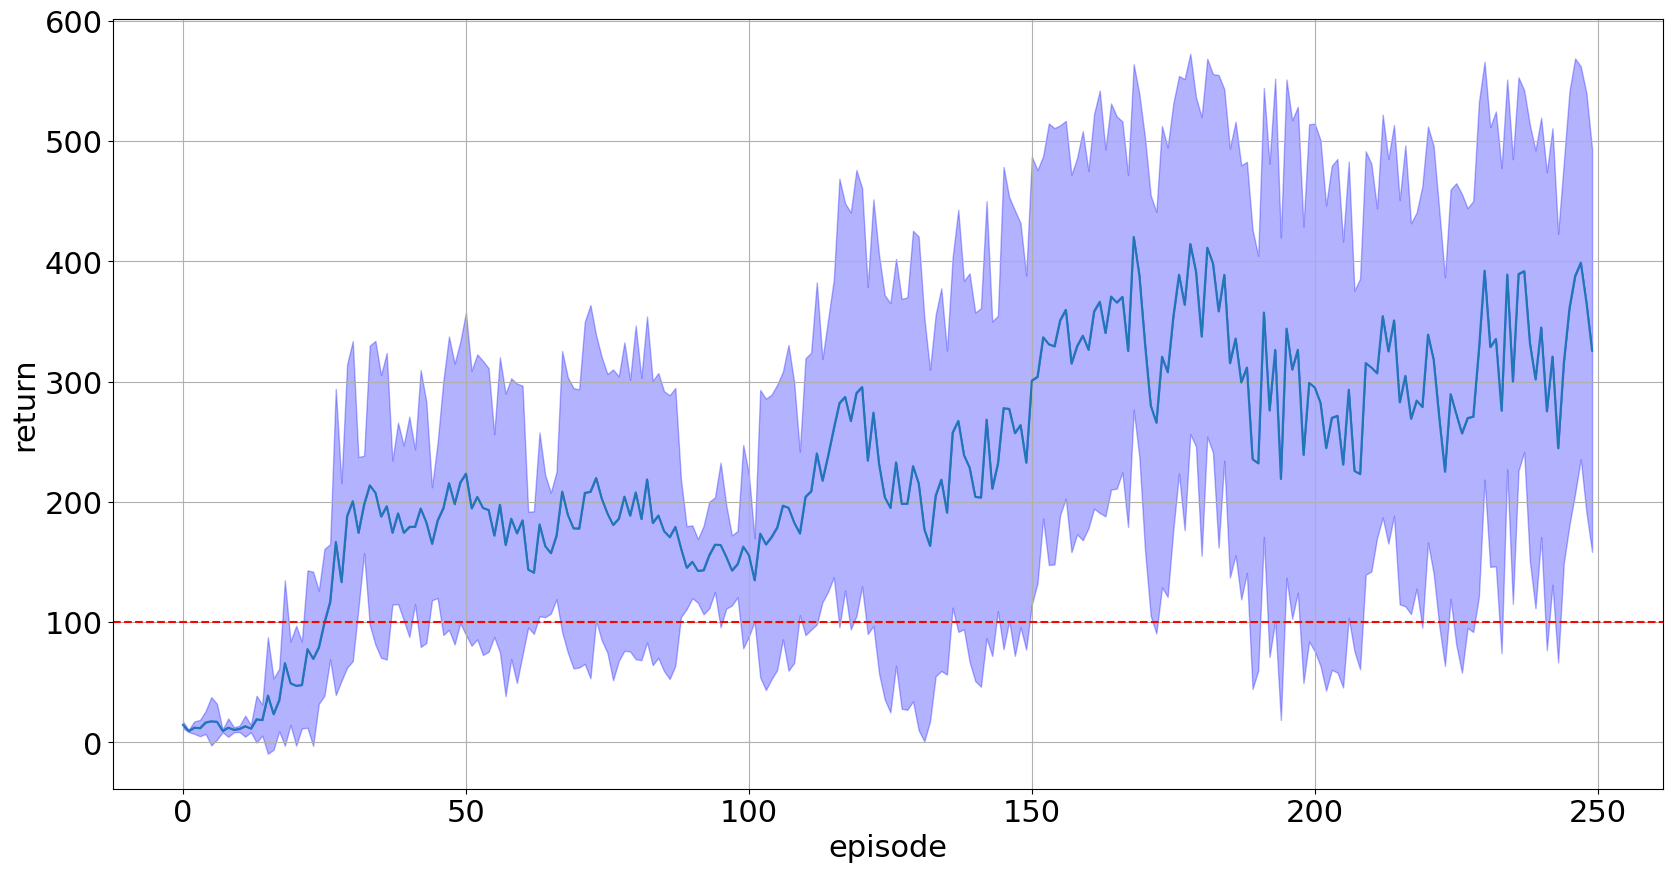

In [23]:
# Plotting the learning curve

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
 
results = torch.tensor(runs_results)
means = results.float().mean(0)
stds = results.float().std(0)

plt.plot(torch.arange(250), means)
plt.ylabel("return")
plt.xlabel("episode")
plt.fill_between(np.arange(250), means, means+stds, alpha=0.3, color='b')
plt.fill_between(np.arange(250), means, means-stds, alpha=0.3, color='b')
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.grid()
plt.show()

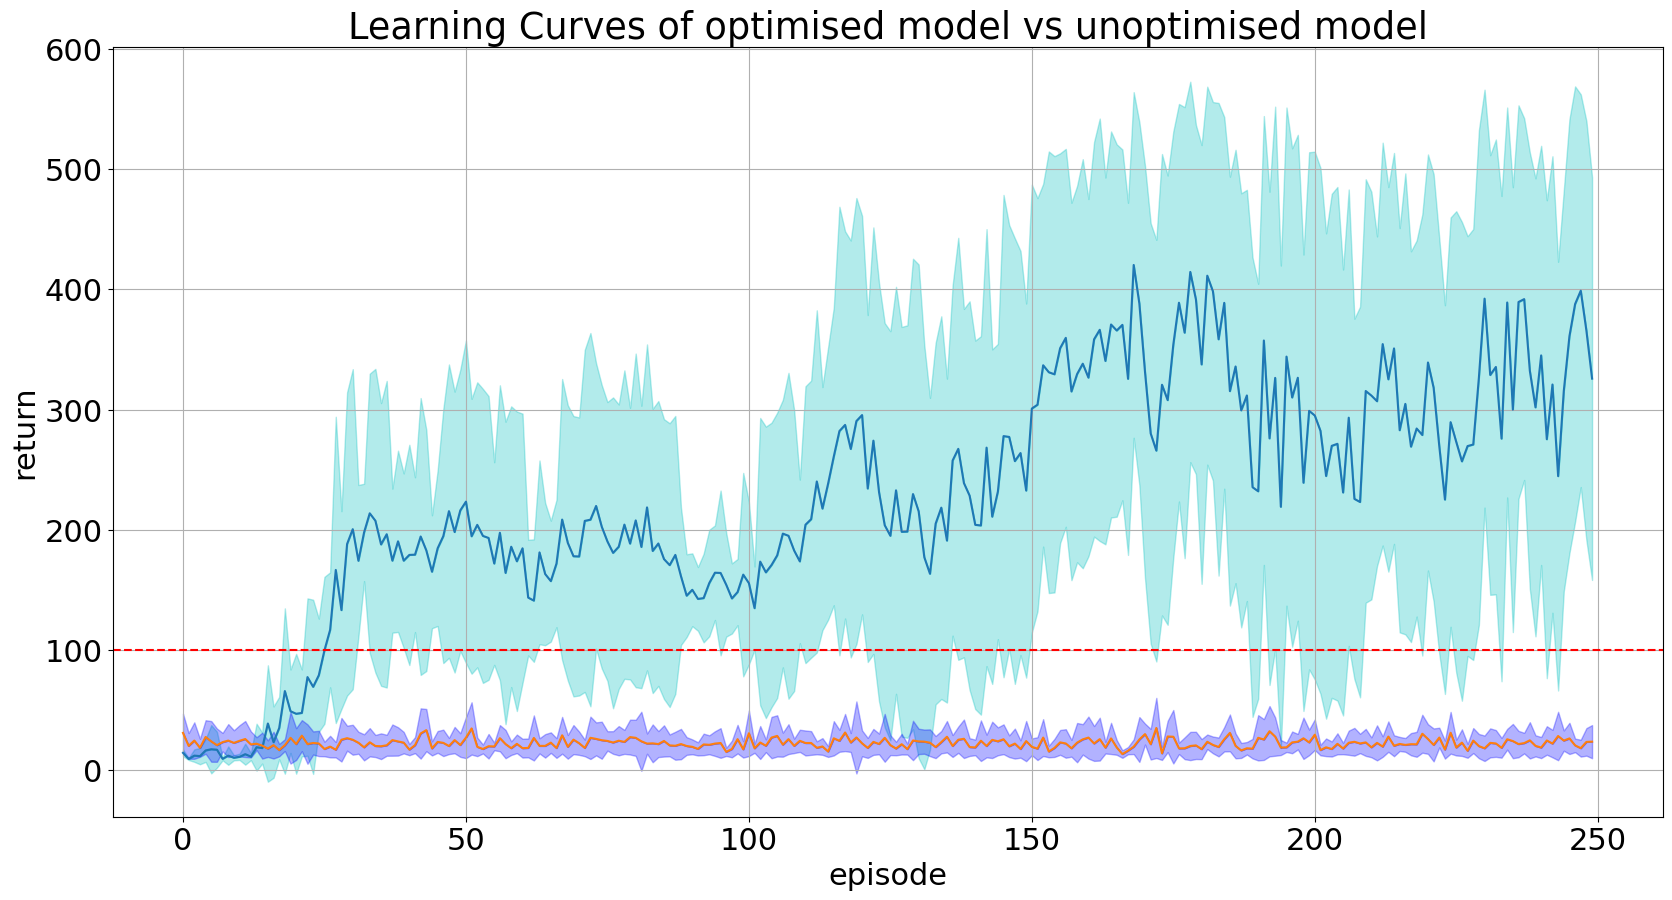

In [24]:
# Plotting the learning curve of optimised and unoptimised model

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

# Results from optimised model
results_opti = torch.tensor(runs_results)
means_opti = results_opti.float().mean(0)
stds_opti = results_opti.float().std(0)

# Results from unoptimised model
results_unopti = torch.tensor(runs_results_unoptimised)
means_unopti = results_unopti.float().mean(0)
stds_unopti = results_unopti.float().std(0)

plt.plot(torch.arange(250), means_opti)
plt.plot(torch.arange(250), means_unopti)
plt.ylabel("return")
plt.xlabel("episode")
plt.fill_between(np.arange(250), means_opti, means_opti+stds_opti, alpha=0.3, color='c')
plt.fill_between(np.arange(250), means_opti, means_opti-stds_opti, alpha=0.3, color='c')
plt.fill_between(np.arange(250), means_unopti, means_unopti+stds_unopti, alpha=0.3, color='b')
plt.fill_between(np.arange(250), means_unopti, means_unopti-stds_unopti, alpha=0.3, color='b')
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.title("Learning Curves of optimised model vs unoptimised model")
plt.grid()
plt.show()

## 1.1 Adjust the hyperparameters of the DQN to tune your agent to perform well in the cart pole environment. 

### Testing out different Epsilons

starting run with 0.1 value
Starting run 1 of 10


c:\Users\Pierre\OneDrive - Imperial College London\YEAR 4-PIERRELAPTOP\Reinforcement Learning\Tutorials\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episo

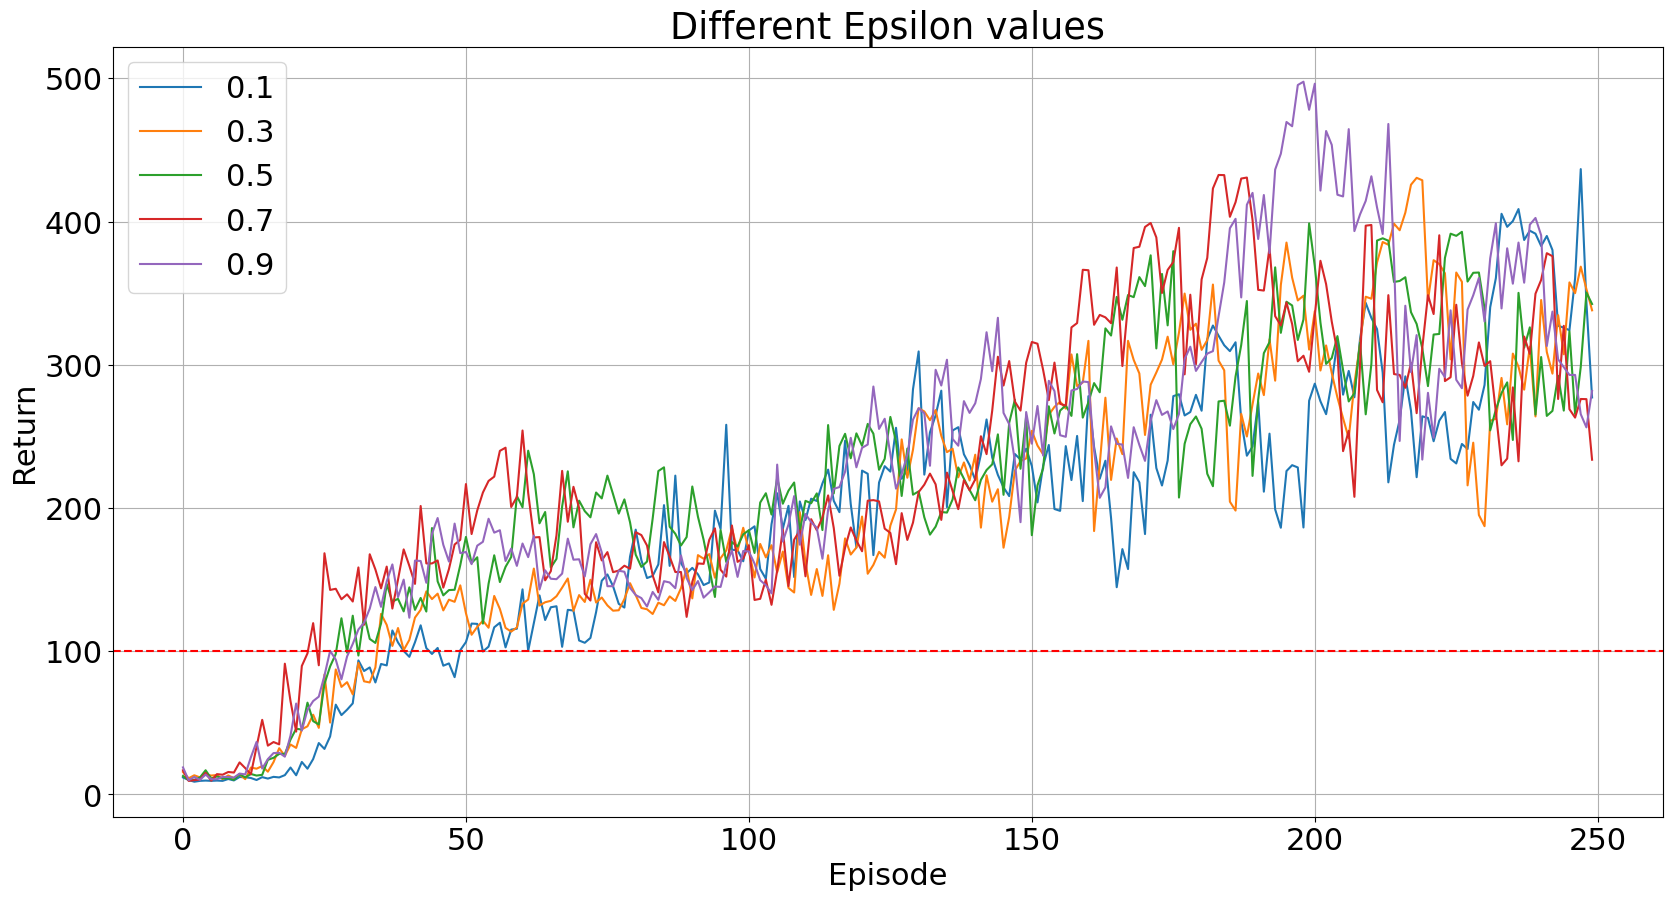

In [19]:
# Different possible learning_rates
epsilons_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Store all the results
total_run_results_eps = []

for eps in epsilons_values:

    print(f"starting run with {eps} value")
    
    hyperparameters = {
        'NUM_RUNS': 10,
        'EPISODES': 250,
        'EPSILON': eps,
        'EPSILON_DECAY': 0.99,
        'LEARNING_RATE': 0.00474,
        'NN_NETWORK': [4, 128, 64, 2],
        'ACTIVATION_FUNCTION': F.leaky_relu,
        'OPTIMIZER': 'Adam',
        'REPLAY_BUFFER_SIZE': 10000,
        'BATCH_SIZE': 15,
        'UPDATE_FREQUENCY': 1,
    }

    runs_results_eps = training(hyperparameters)

    total_run_results_eps.append(runs_results_eps)

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

for i, runs_results in enumerate(total_run_results_eps):

    results_eps = torch.tensor(runs_results)
    means = results_eps.float().mean(0)
    stds = results_eps.float().std(0)
    plt.plot(torch.arange(250), means, label=str(epsilons_values[i]))

plt.ylabel("Return")
plt.xlabel("Episode")
plt.title("Different Epsilon values")
plt.grid()
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.legend(loc='upper left')
plt.show()

### Testing out different Epislon Decay

In [29]:
# Different possible learning_rates
epsilons_decay_values = [0.9, 0.95, 0.99]

# Store all the results
total_run_results_eps_decay = []

for eps_decay in epsilons_decay_values:

    print(f"starting run with {eps_decay} decay value")
    
    hyperparameters = {
        'NUM_RUNS': 10,
        'EPISODES': 250,
        'EPSILON': 0.74,
        'EPSILON_DECAY': eps_decay,
        'LEARNING_RATE': 0.00474,
        'NN_NETWORK': [4, 128, 64, 2],
        'ACTIVATION_FUNCTION': F.leaky_relu,
        'OPTIMIZER': 'Adam',
        'REPLAY_BUFFER_SIZE': 10000,
        'BATCH_SIZE': 15,
        'UPDATE_FREQUENCY': 1,
    }

    runs_results_eps_decay = training(hyperparameters)

    total_run_results_eps_decay.append(runs_results_eps_decay)


starting run with 0.9 decay value
Starting run 1 of 10


c:\Users\Pierre\OneDrive - Imperial College London\YEAR 4-PIERRELAPTOP\Reinforcement Learning\Tutorials\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episo

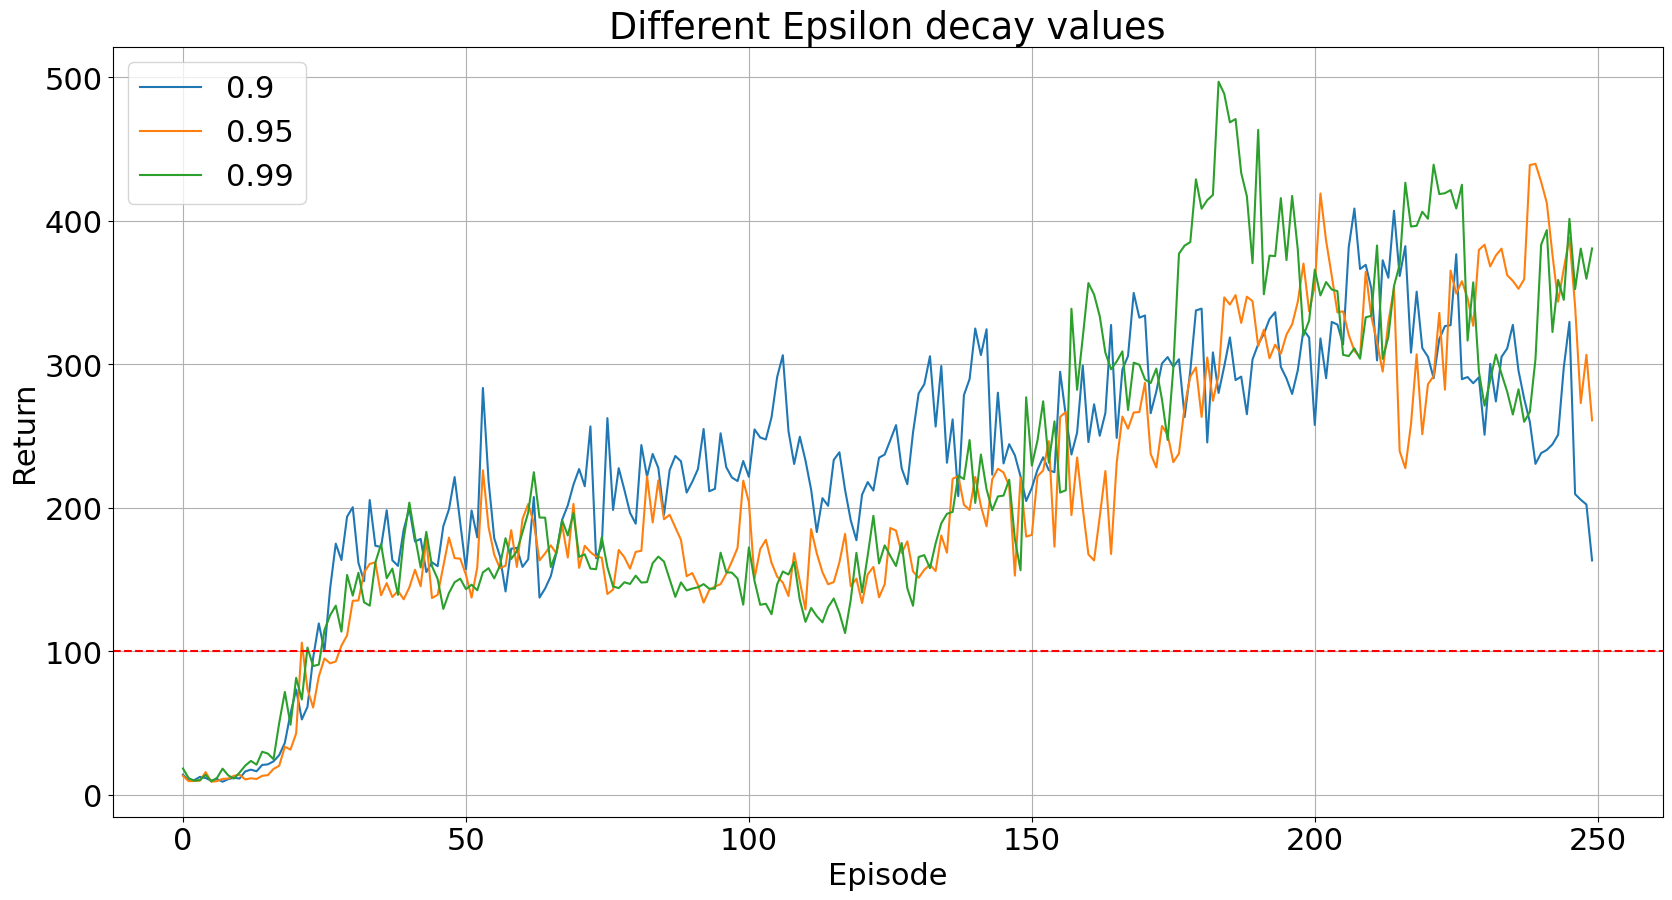

In [31]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

for i, runs_results_decay in enumerate(total_run_results_eps_decay):

    results_eps_decay = torch.tensor(runs_results_decay)
    means_decay = results_eps_decay.float().mean(0)
    stds_decay = results_eps_decay.float().std(0)
    plt.plot(torch.arange(250), means_decay, label=str(epsilons_decay_values[i]))

plt.ylabel("Return")
plt.xlabel("Episode")
plt.title("Different Epsilon decay values")
plt.grid()
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.legend(loc='upper left')
plt.show()

### Testing out Different Learning Rates

In [25]:
# Different possible learning_rates
Learning_rates_values = [0.001, 0.00474, 0.01, 0.1]

# Store all the results
total_run_results_lr = []

for lr in Learning_rates_values:
    
    hyperparameters = {
         'NUM_RUNS': 10,
        'EPISODES': 250,
        'EPSILON': 0.74,
        'EPSILON_DECAY': 0.99,
        'LEARNING_RATE': lr,
        'NN_NETWORK': [4, 128, 64, 2],
        'ACTIVATION_FUNCTION': F.leaky_relu,
        'OPTIMIZER': 'Adam',
        'REPLAY_BUFFER_SIZE': 10000,
        'BATCH_SIZE': 15,
        'UPDATE_FREQUENCY': 1,
    }

    runs_results_lr = training(hyperparameters)

    total_run_results_lr.append(runs_results_lr)

Starting run 1 of 10


c:\Users\Pierre\OneDrive - Imperial College London\YEAR 4-PIERRELAPTOP\Reinforcement Learning\Tutorials\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episo

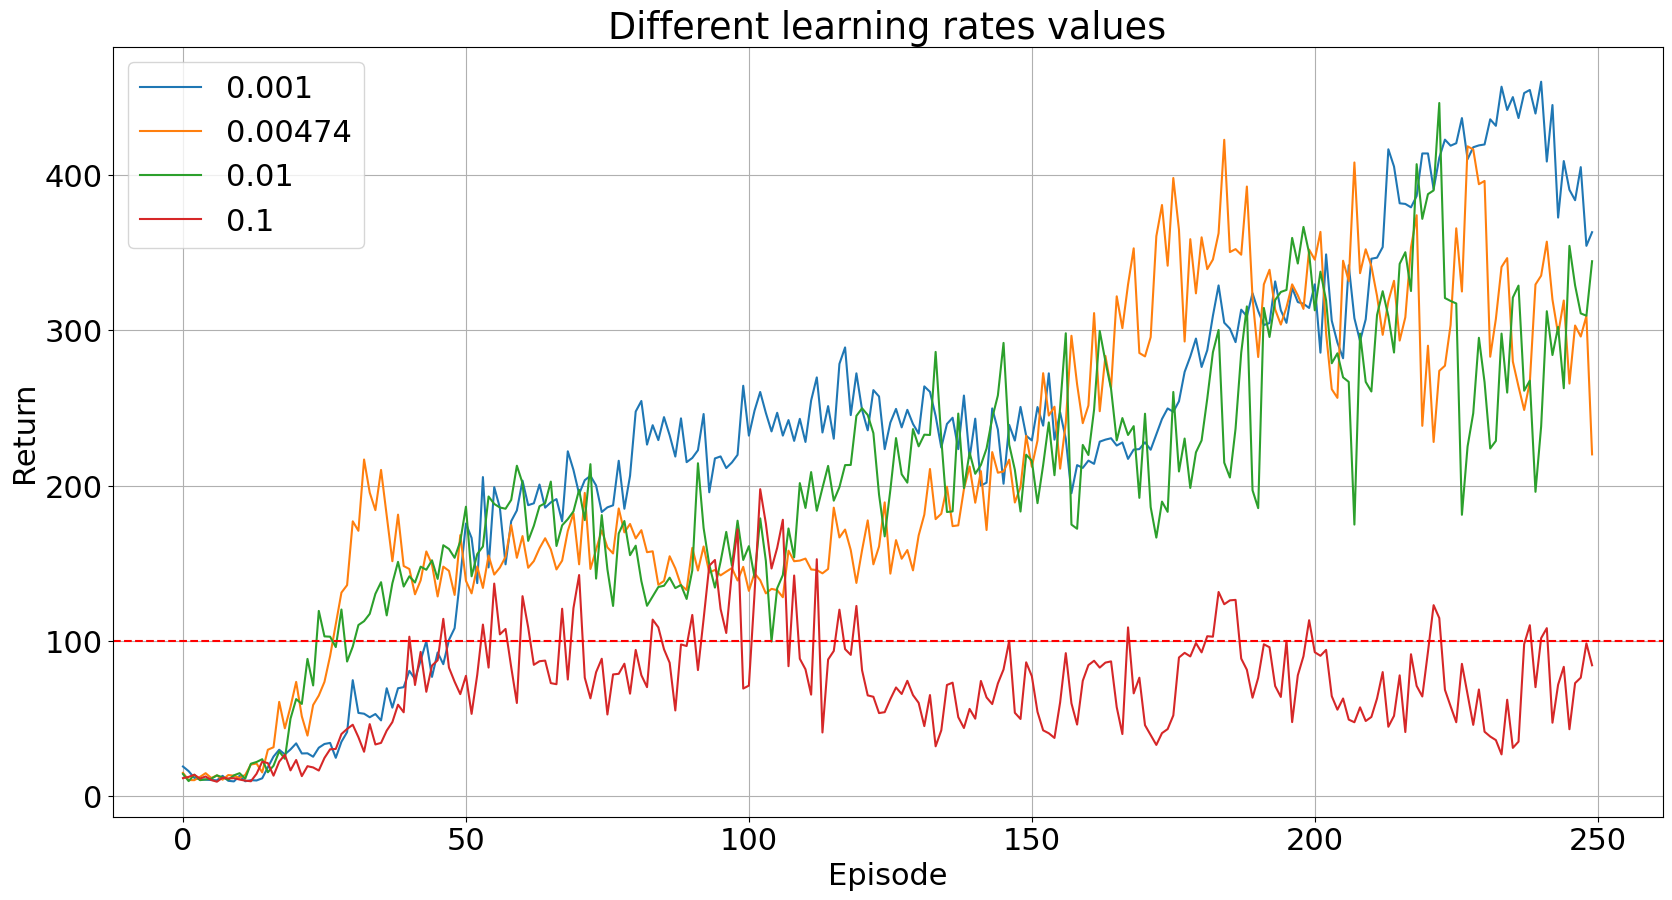

In [26]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

for i, runs_results in enumerate(total_run_results_lr):

    results = torch.tensor(runs_results)
    means = results.float().mean(0)
    stds = results.float().std(0)
    plt.plot(torch.arange(250), means, label=str(Learning_rates_values[i]))

plt.ylabel("Return")
plt.xlabel("Episode")
plt.title("Different learning rates values")
plt.grid()
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.legend(loc='upper left')
plt.show()

### Testing out different Neural Network Architecture

In [27]:
# Different possible Neural netowk architectures
NN_architectures = [[4, 18, 2], [4, 32, 2],[4, 32, 18, 2],[4, 64, 32, 2],[4, 64, 128, 2],[4, 128, 64, 2]]

# Store all the results
total_run_results_NN_arch = []

for NN_arch in NN_architectures:
    
    hyperparameters = {
        'NUM_RUNS': 10,
        'EPISODES': 250,
        'EPSILON': 0.74,
        'EPSILON_DECAY': 0.99,
        'LEARNING_RATE': 0.00474,
        'NN_NETWORK': NN_arch,
        'ACTIVATION_FUNCTION': F.leaky_relu,
        'OPTIMIZER': 'Adam',
        'REPLAY_BUFFER_SIZE': 10000,
        'BATCH_SIZE': 15,
        'UPDATE_FREQUENCY': 1,
    }

    runs_results_NN = training(hyperparameters)

    total_run_results_NN_arch.append(runs_results_NN)

Starting run 1 of 10


c:\Users\Pierre\OneDrive - Imperial College London\YEAR 4-PIERRELAPTOP\Reinforcement Learning\Tutorials\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episo

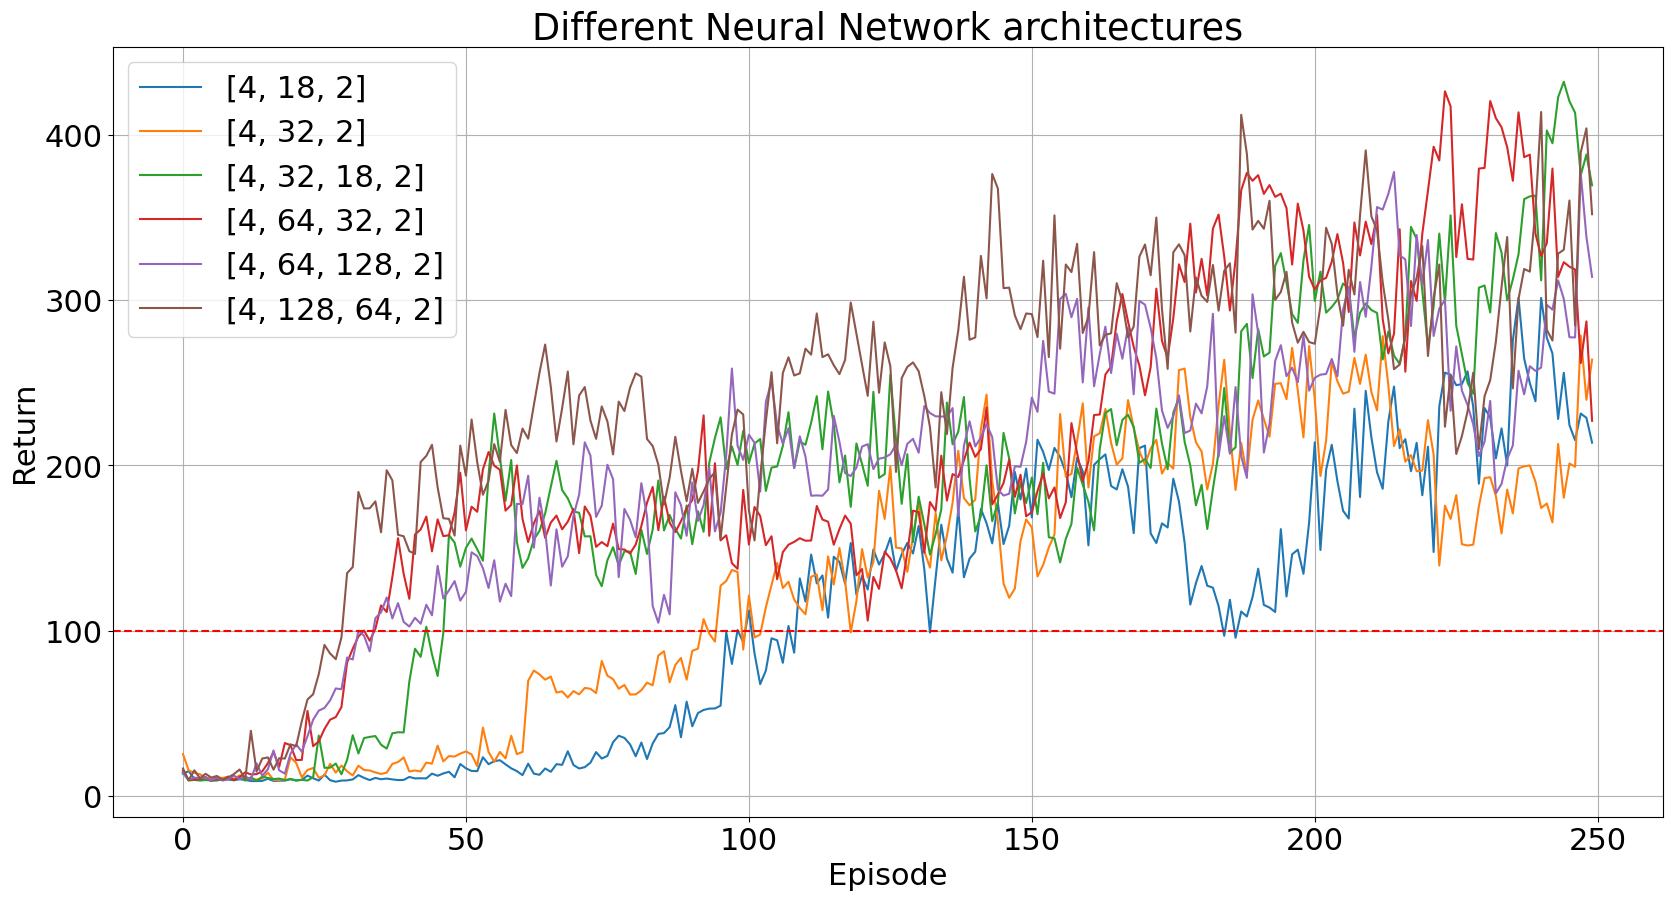

In [28]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

for i, runs_results_NN in enumerate(total_run_results_NN_arch):

    results_NN = torch.tensor(runs_results_NN)
    means_NN = results_NN.float().mean(0)
    stds_NN = results_NN.float().std(0)
    plt.plot(torch.arange(250), means_NN, label=str(NN_architectures[i]))

plt.ylabel("Return")
plt.xlabel("Episode")
plt.title("Different Neural Network architectures")
plt.grid()
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.legend(loc='upper left')
plt.show()

### Testing out different Activation Function

In [32]:
# Different possible learning_rates
activation_functions = [F.sigmoid, F.relu, F.leaky_relu]

# Store all the results
total_run_results_AF = []

for act_func in activation_functions:
    
    hyperparameters = {
        'NUM_RUNS': 10,
        'EPISODES': 250,
        'EPSILON': 0.74,
        'EPSILON_DECAY': 0.99,
        'LEARNING_RATE': 0.00474,
        'NN_NETWORK': [4, 128, 64, 2],
        'ACTIVATION_FUNCTION': act_func,
        'OPTIMIZER': 'Adam',
        'REPLAY_BUFFER_SIZE': 10000,
        'BATCH_SIZE': 15,
        'UPDATE_FREQUENCY': 1,
    }

    runs_results_AF = training(hyperparameters)

    total_run_results_AF.append(runs_results_AF)

Starting run 1 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
epi

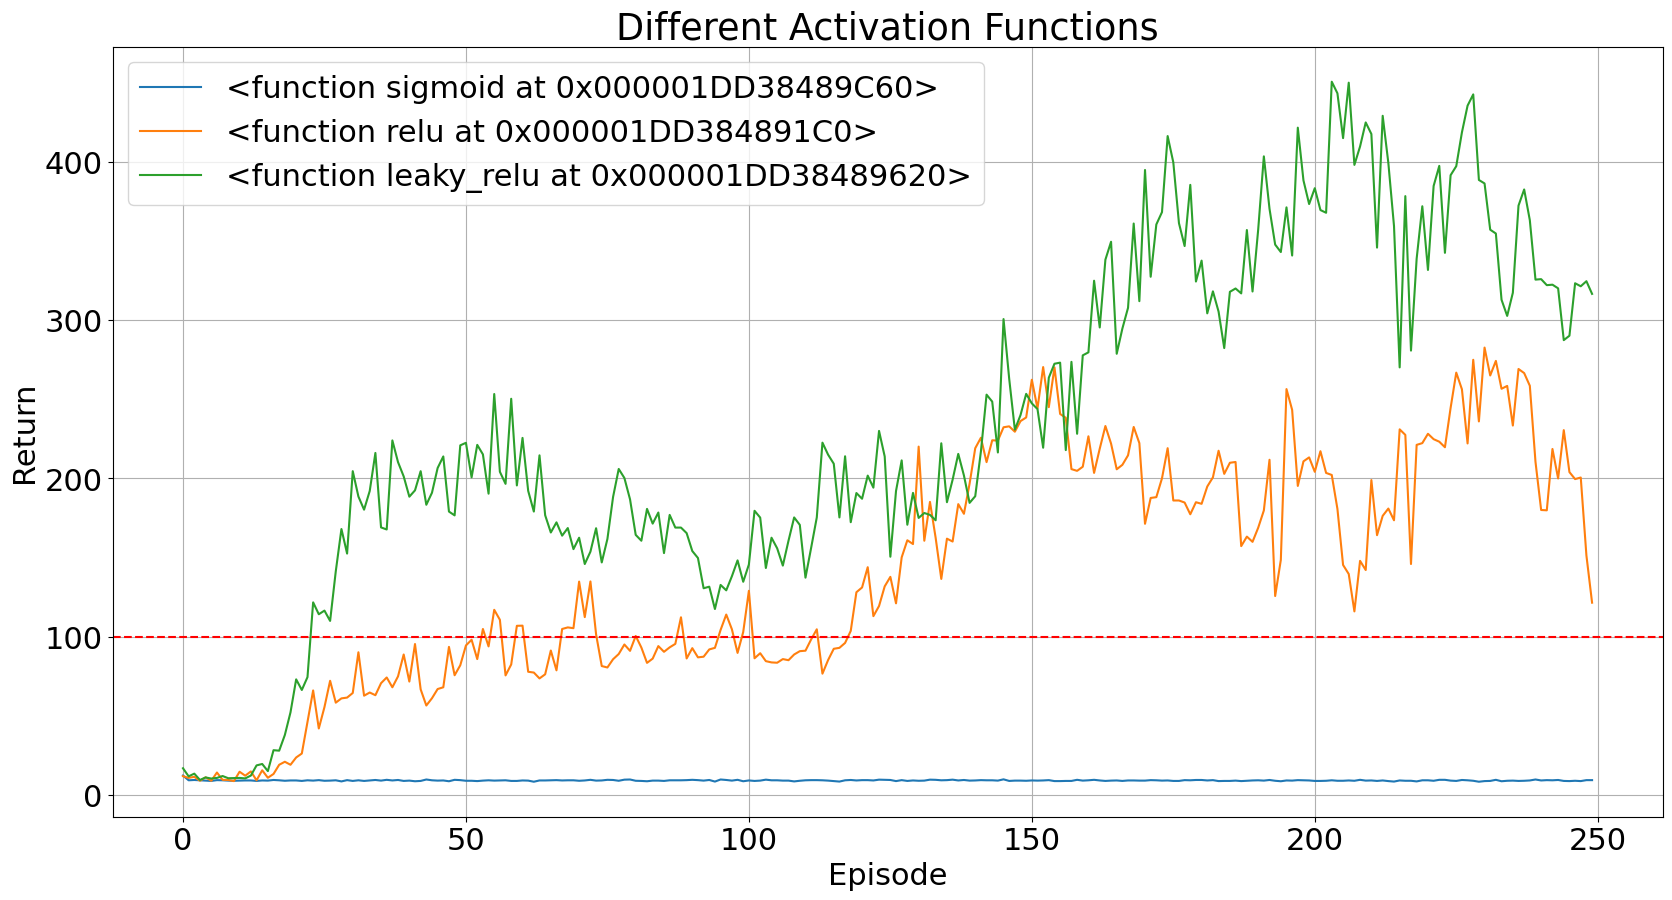

In [33]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

for i, runs_results_AF in enumerate(total_run_results_AF):

    results_AF = torch.tensor(runs_results_AF)
    means_AF = results_AF.float().mean(0)
    stds_AF = results_AF.float().std(0)
    plt.plot(torch.arange(250), means_AF, label=str(activation_functions[i]))

plt.ylabel("Return")
plt.xlabel("Episode")
plt.title("Different Activation Functions")
plt.grid()
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.legend(loc='upper left')
plt.show()

### Testing out different optimisers

In [34]:
# Different possible learning_rates
optimisers = ['SGD', 'Adam']

# Store all the results
total_run_results_optimisers = []

for opti in optimisers:
    
    hyperparameters = {
        'NUM_RUNS': 10,
        'EPISODES': 250,
        'EPSILON': 0.74,
        'EPSILON_DECAY': 0.99,
        'LEARNING_RATE': 0.00474,
        'NN_NETWORK': [4, 128, 64, 2],
        'ACTIVATION_FUNCTION': F.leaky_relu,
        'OPTIMIZER': opti,
        'REPLAY_BUFFER_SIZE': 10000,
        'BATCH_SIZE': 15,
        'UPDATE_FREQUENCY': 1,
    }

    runs_results_opti = training(hyperparameters)

    total_run_results_optimisers.append(runs_results_opti)

Starting run 1 of 10


c:\Users\Pierre\OneDrive - Imperial College London\YEAR 4-PIERRELAPTOP\Reinforcement Learning\Tutorials\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episo

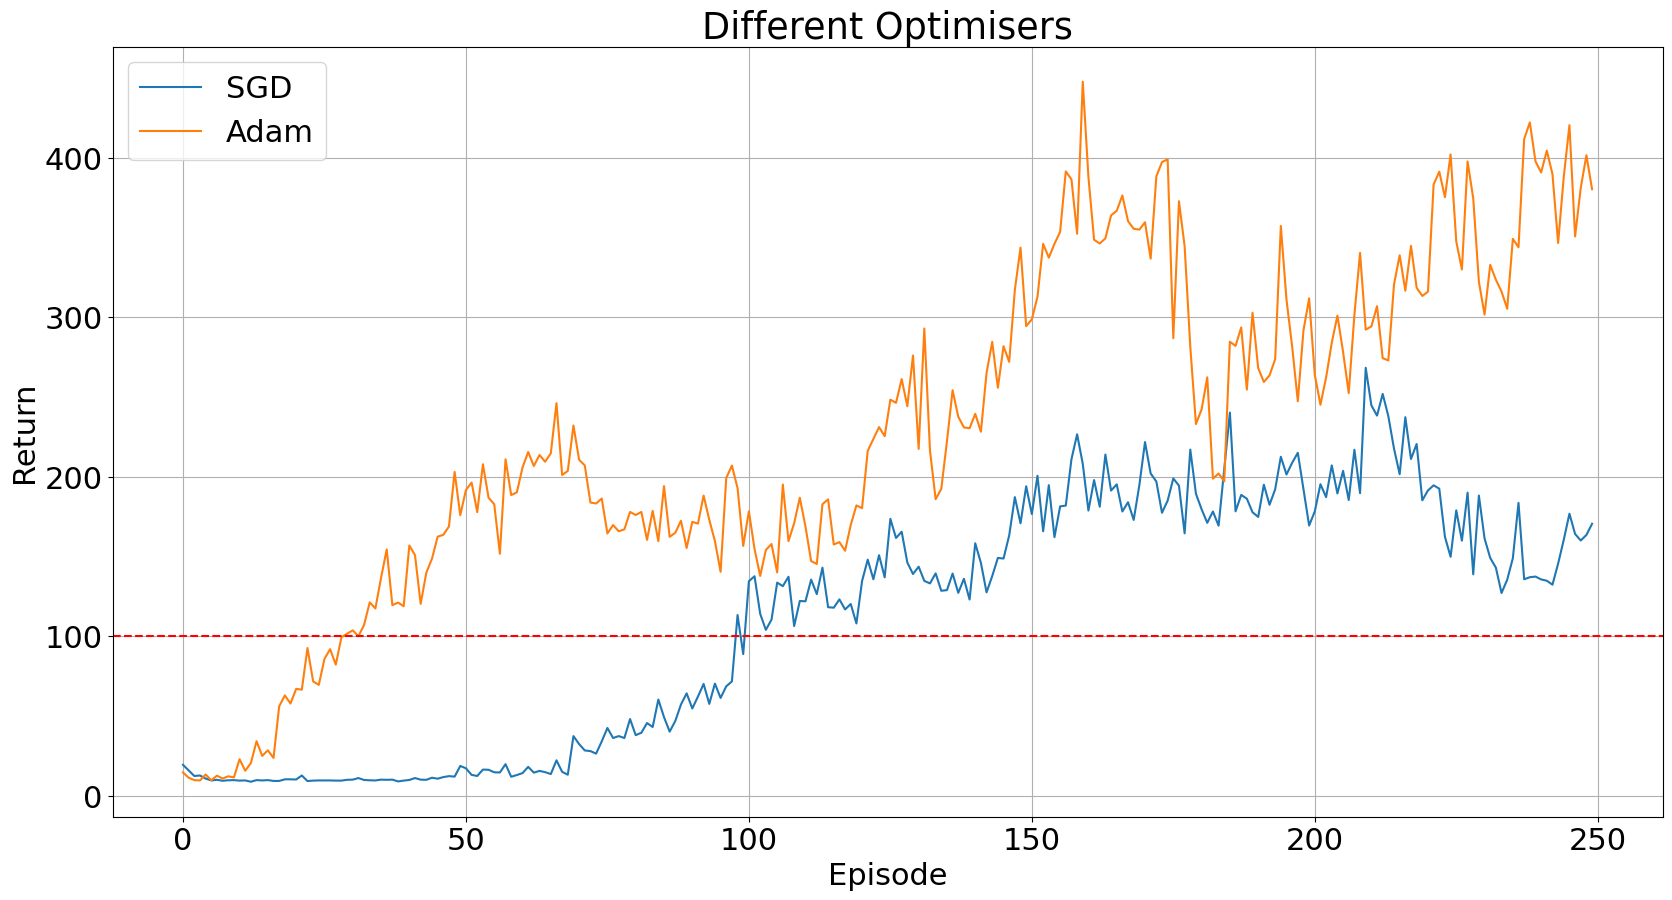

In [36]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

for i, runs_results_opti in enumerate(total_run_results_optimisers):

    results_opti = torch.tensor(runs_results_opti)
    means_opti = results_opti.float().mean(0)
    stds_opti = results_opti.float().std(0)
    plt.plot(torch.arange(250), means_opti, label=str(optimisers[i]))

plt.ylabel("Return")
plt.xlabel("Episode")
plt.title("Different Optimisers")
plt.grid()
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.legend(loc='upper left')
plt.show()

### Testing out diferent Buffer Size

In [37]:
# Different possible Buffer sizes
buffer_size_values = [100, 500, 1000, 10000, 15000, 20000]

# Store all the results
total_run_results_buffer = []

for buffer_size in buffer_size_values:
    
    hyperparameters = {
        'NUM_RUNS': 10,
        'EPISODES': 250,
        'EPSILON': 0.74,
        'EPSILON_DECAY': 0.99,
        'LEARNING_RATE': 0.00474,
        'NN_NETWORK': [4, 128, 64, 2],
        'ACTIVATION_FUNCTION': F.leaky_relu,
        'OPTIMIZER': 'Adam',
        'REPLAY_BUFFER_SIZE': buffer_size,
        'BATCH_SIZE': 15,
        'UPDATE_FREQUENCY': 1,
    }

    runs_results_buffer_size = training(hyperparameters)

    total_run_results_buffer.append(runs_results_buffer_size)

Starting run 1 of 10


c:\Users\Pierre\OneDrive - Imperial College London\YEAR 4-PIERRELAPTOP\Reinforcement Learning\Tutorials\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episo

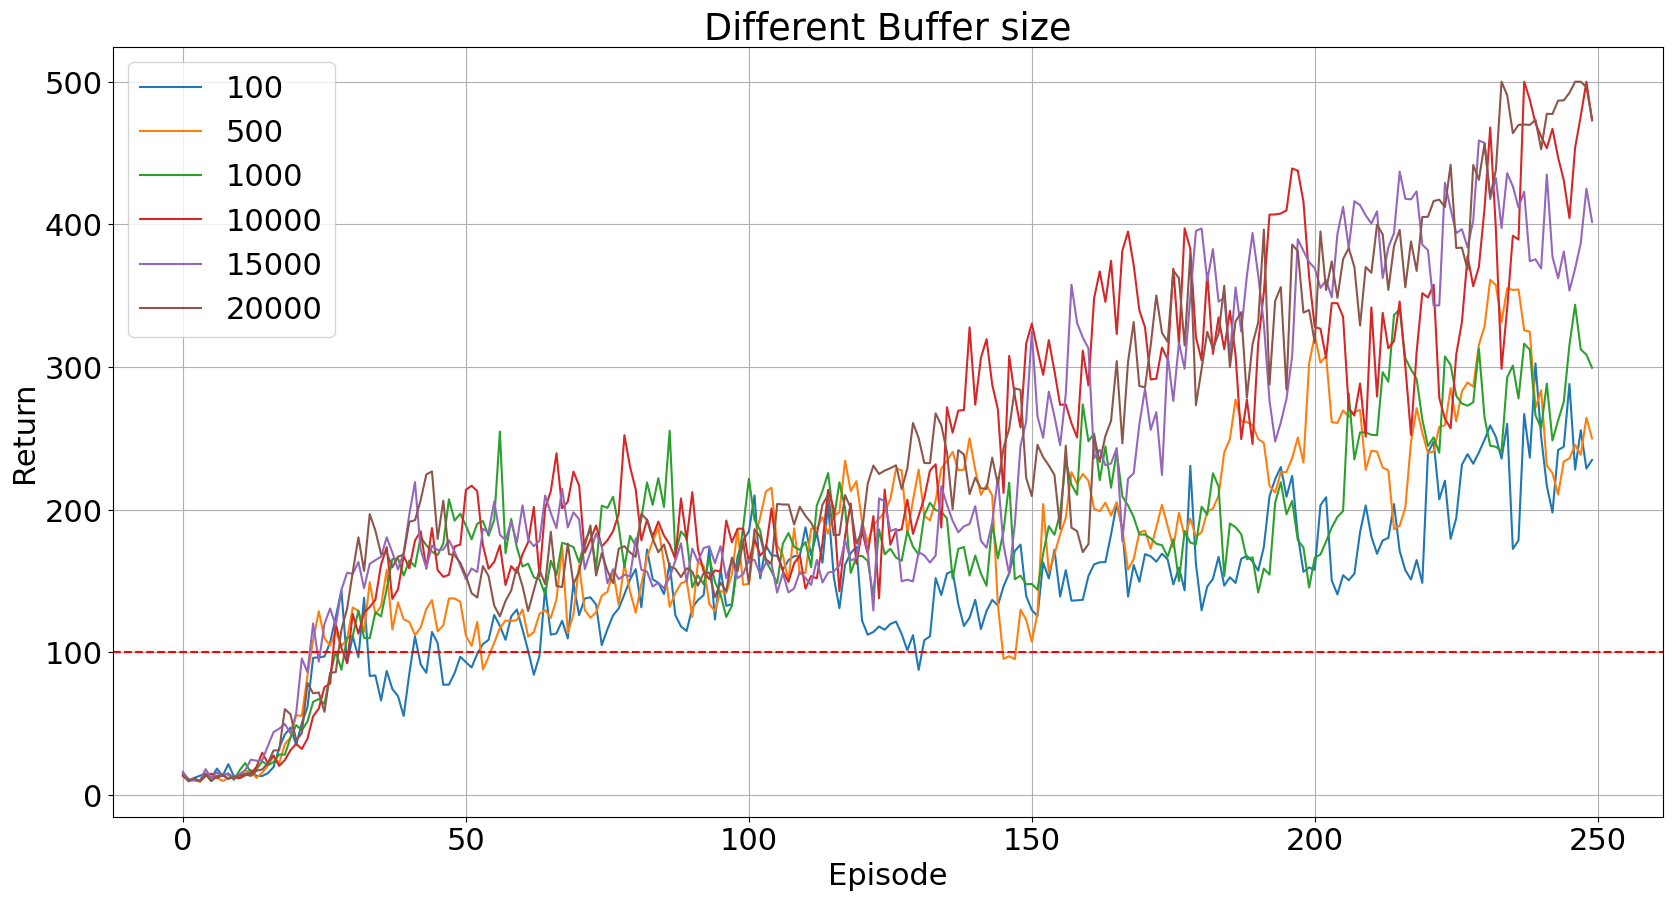

In [38]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

for i, runs_results_buffsize in enumerate(total_run_results_buffer):

    results_buffsize = torch.tensor(runs_results_buffsize)
    means_buffsize = results_buffsize.float().mean(0)
    stds_buffsize = results_buffsize.float().std(0)
    plt.plot(torch.arange(250), means_buffsize, label=str(buffer_size_values[i]))

plt.ylabel("Return")
plt.xlabel("Episode")
plt.title("Different Buffer size")
plt.grid()
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.legend(loc='upper left')
plt.show()

### Testing out diferent Batch Size

In [39]:
# Different possible Batch sizes
batch_size_values = [1, 2, 5, 10, 15, 20]

# Store all the results
total_run_results_batch = []

for batch_size in batch_size_values:
    
    hyperparameters = {
        'NUM_RUNS': 10,
        'EPISODES': 250,
        'EPSILON': 0.74,
        'EPSILON_DECAY': 0.99,
        'LEARNING_RATE': 0.00474,
        'NN_NETWORK': [4, 128, 64, 2],
        'ACTIVATION_FUNCTION': F.leaky_relu,
        'OPTIMIZER': 'Adam',
        'REPLAY_BUFFER_SIZE': 10000,
        'BATCH_SIZE': batch_size,
        'UPDATE_FREQUENCY': 1,
    }

    runs_results_batch_size = training(hyperparameters)

    total_run_results_batch.append(runs_results_batch_size)

Starting run 1 of 10


c:\Users\Pierre\OneDrive - Imperial College London\YEAR 4-PIERRELAPTOP\Reinforcement Learning\Tutorials\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episo

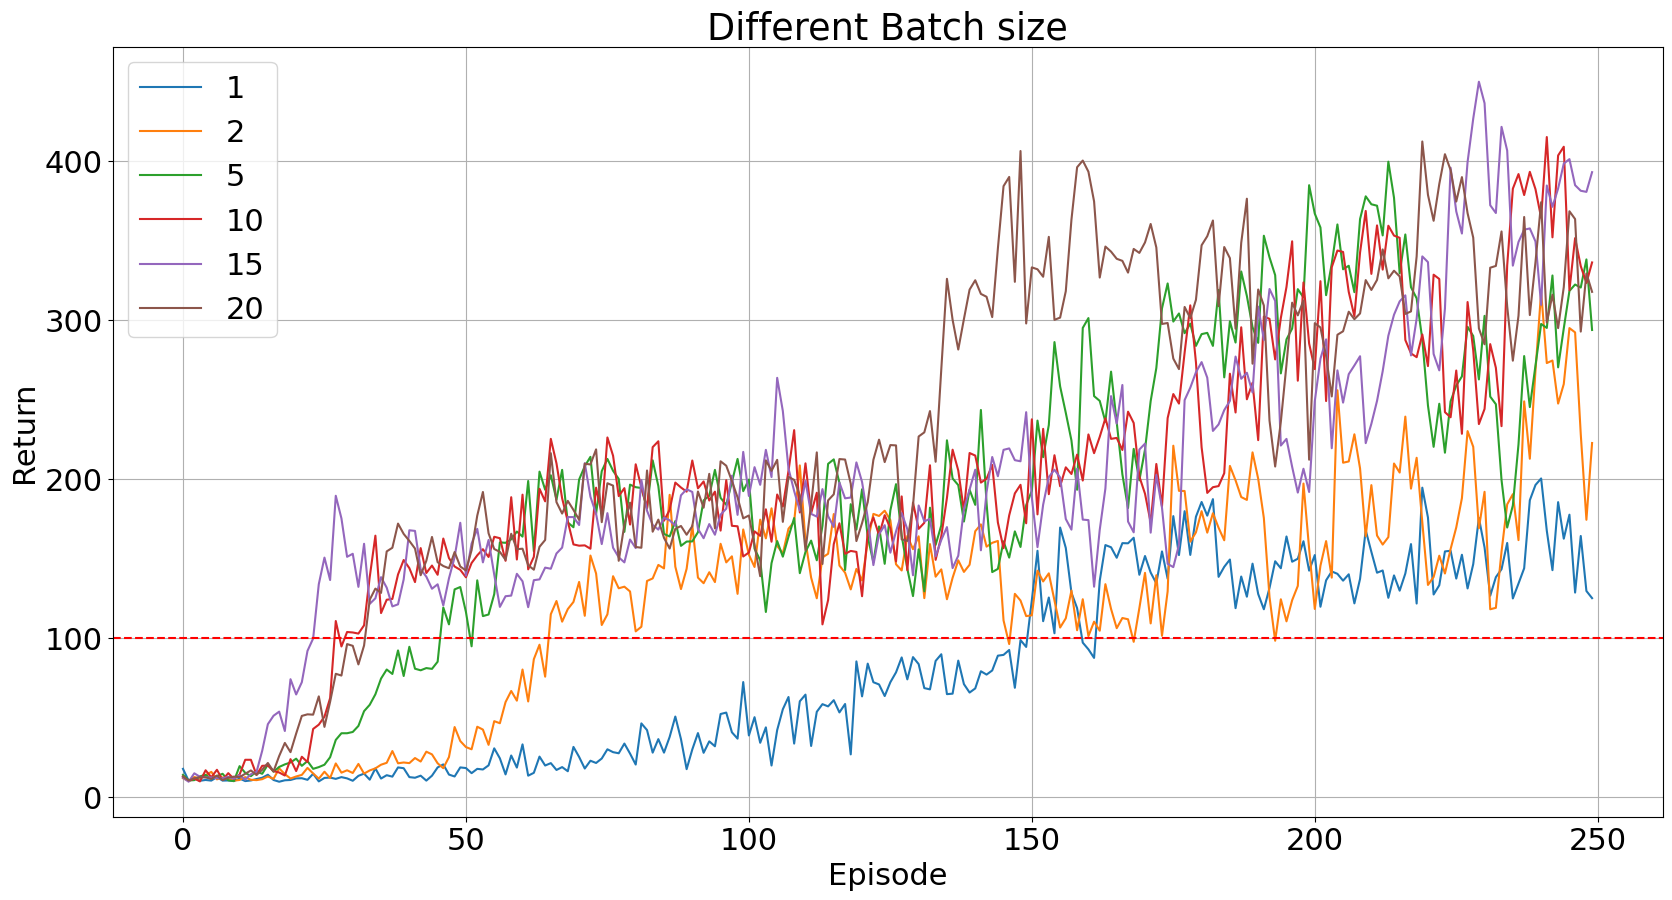

In [40]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

for i, runs_results_bacthsize in enumerate(total_run_results_batch):

    results_batchsize = torch.tensor(runs_results_bacthsize)
    means_batchsize = results_batchsize.float().mean(0)
    stds_batchsize = results_batchsize.float().std(0)
    plt.plot(torch.arange(250), means_batchsize, label=str(batch_size_values[i]))

plt.ylabel("Return")
plt.xlabel("Episode")
plt.title("Different Batch size")
plt.grid()
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.legend(loc='upper left')
plt.show()

### Testing out diferent Update Frequency

In [42]:
# Different possible Batch sizes
update_frequency_values = [1, 2, 5, 10, 20, 40]

# Store all the results
total_run_results_update_frequency = []

for update_frequency in update_frequency_values:
    
    hyperparameters = {
        'NUM_RUNS': 10,
        'EPISODES': 250,
        'EPSILON': 0.74,
        'EPSILON_DECAY': 0.99,
        'LEARNING_RATE': 0.00474,
        'NN_NETWORK': [4, 128, 64, 2],
        'ACTIVATION_FUNCTION': F.leaky_relu,
        'OPTIMIZER': 'Adam',
        'REPLAY_BUFFER_SIZE': 10000,
        'BATCH_SIZE': 15,
        'UPDATE_FREQUENCY': update_frequency,
    }

    runs_results_update_frequency = training(hyperparameters)

    total_run_results_update_frequency.append(runs_results_update_frequency)

Starting run 1 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
epi

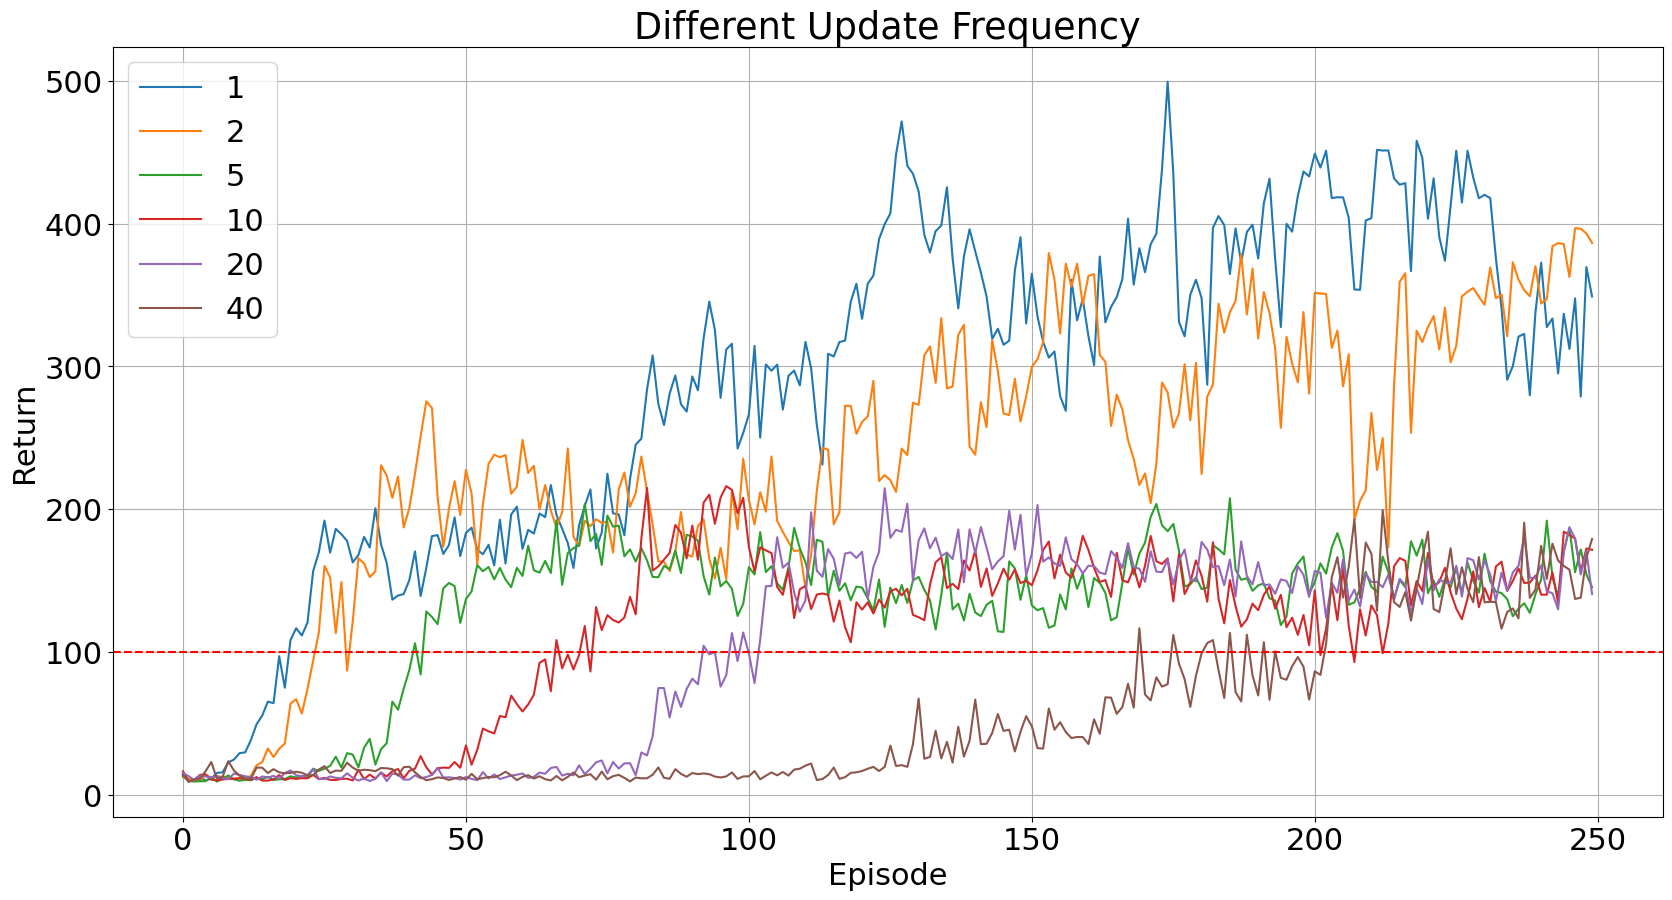

In [43]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

for i, runs_results_updfreq in enumerate(total_run_results_update_frequency):

    results_updfreq = torch.tensor(runs_results_updfreq)
    means_updfreq = results_updfreq.float().mean(0)
    stds_updfeq = results_updfreq.float().std(0)
    plt.plot(torch.arange(250), means_updfreq, label=str(update_frequency_values[i]))

plt.ylabel("Return")
plt.xlabel("Episode")
plt.title("Different Update Frequency")
plt.grid()
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.legend(loc='upper left')
plt.show()

Fine-tuning a DQN demands exploration of numerous hyperparameters. A total of nine hyperparameters were chosen for optimization, with two additional hyperparameters held constant. Table 1 provides details on each hyperparameter, its range of values, and the reasons for exploration.

#### Hyperparameter Tuning Table (Table 1)

| Hyperparameter         | Range of Values        | Explanation                                                     |
|------------------------|------------------------|-----------------------------------------------------------------|
| Epsilon (ε)            | 0 < ε < 1               | Adjusts the initial value for exploration and exploitation balance.|
| Epsilon Decay (εdecay) | 0.9 < εdecay < 0.99    | Controls the decay rate of ε to observe its impact on learning curves.|
| Learning Rate (α)      | 0.0001 < α < 0.1       | Influences convergence speed and training performance.           |
| Neural Network Architecture | Multiple options   | Different architectures are tested to select the most effective one.|
| Activation Function    | [Sigmoid, ReLU, LeakyReLU] | Explores different activation functions for optimal performance.|
| Optimizer              | [SGD, Adam]            | Tests the Adam optimizer for potential performance enhancement. |
| Buffer Size            | [100, 500, 1000, 10000, 15000, 20000] | Impacts learning curve; testing for optimal buffer size.   |
| Batch Size             | [1, 2, 5, 10, 15, 20]   | Explores a range of batch sizes to observe their impact.        |
| Update Frequency      | [1, 2, 5, 10, 20, 40]  | Varies update frequency to determine optimal performance.      |

**Table 1:** Hyperparameters chosen for tuning with their range of values.

#### Hyperparameter Exploration with Optuna

Given the multitude of hyperparameters and their search spaces, Optuna was used to facilitate the exploration of optimal hyperparameters. The objective function set for minimization was the total number of episodes exceeding a threshold of 100. The lower the objective function value, the greater the number of episodes surpassing the threshold, indicating better performance.

A total of 200 runs were conducted, and the parameters found by Optuna were:
- ε: 0.743
- εdecay: 0.99
- α: 0.00474
- Activation Function: LeakyReLu
- Neural Network Architecture: [4, 128, 64, 2]
- Optimizer: Adam
- Buffer Size: 1000
- Batch size: 20
- Update Frequency: 2

#### Final Configuration Testing

Diverse combinations of these hyperparameters were tested to ascertain the most effective final configuration. Testing involved varying only one parameter while keeping others constant to observe the impact on learning curves and select the optimal configuration.


# Question 2: Visualise your DQN policy

## 2.1:  Slices of the greedy policy action

Plot the greedy policy according to your DQN in 4 separate two dimensional plots displaying pole
angular velocity on the y-axis against pole angle on the x-axis. Fix the cart position to zero (centre of
the track) and use cart velocities of 0, 0.5, 1 and 2. Use the “Cividis” colourmap ensuring you specify
whether pushing the cart to the left is denoted by yellow or blue.
Show the graphic and briefly comment on your results.

In [3]:
hyperparameters = {
    'NUM_RUNS': 10,
    'EPISODES': 250,
    'EPSILON': 0.74,
    'EPSILON_DECAY': 0.99,
    'LEARNING_RATE': 0.00474,
    'NN_NETWORK': [4, 128, 64, 2],
    'ACTIVATION_FUNCTION': F.leaky_relu,
    'OPTIMIZER': 'Adam',
    'REPLAY_BUFFER_SIZE': 10000,
    'BATCH_SIZE': 15,
    'UPDATE_FREQUENCY': 1,
}

In [4]:
# Train the optimised system
optimised_policy_network = train_policy_network(hyperparameters)

Starting run 1 of 10


c:\Users\Pierre\OneDrive - Imperial College London\YEAR 4-PIERRELAPTOP\Reinforcement Learning\Tutorials\rl\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 2 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 3 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 4 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 5 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 6 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 7 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 8 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episode  250 / 250
Starting run 9 of 10
episode  50 / 250
episode  100 / 250
episode  150 / 250
episode  200 / 250
episo

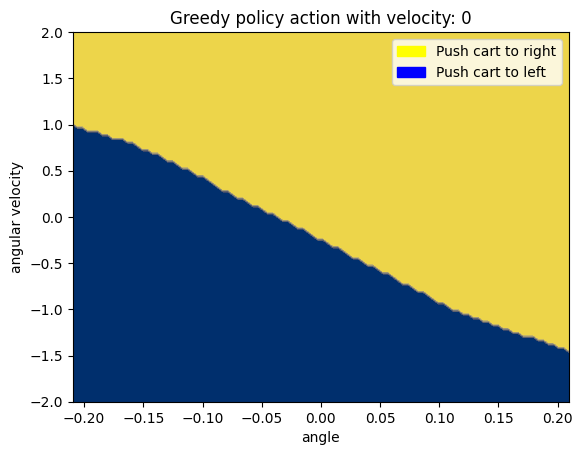

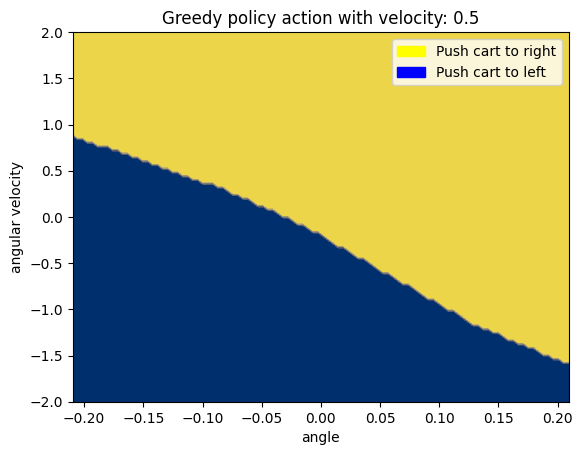

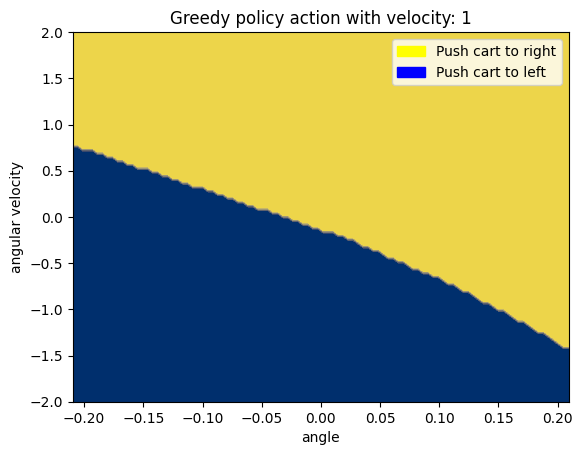

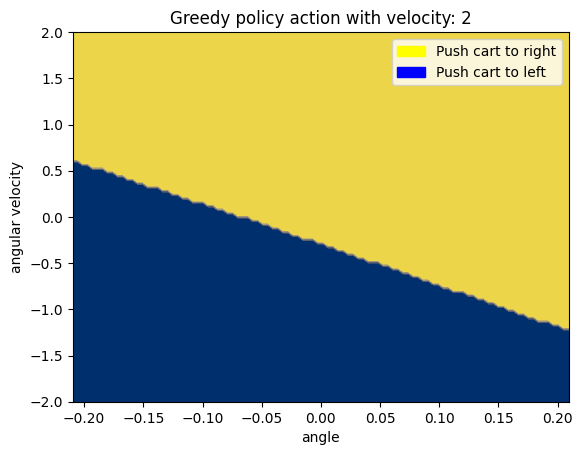

In [5]:
import matplotlib
# Visualising the greedy Q-values for a stationary cart in the middle of the track
# 2D plot showing policy as a function of pole angle and angular velocity (omega)

# This plots the policy and Q values according to the network currently
# stored in the variable "policy_net"

# All visualisations provided here are placeholders and you can modify these plots

# Make sure to include appropriate labels and/or legends when presenting your plot

policy_net = optimised_policy_network  
q = False    # whether q values or greedy policy is visualised

angle_range = .2095 # you may modify this range
omega_range = 2     # you may modify this range

angle_samples = 100
omega_samples = 100
angles = torch.linspace(angle_range, -angle_range, angle_samples)
omegas = torch.linspace(-omega_range, omega_range, omega_samples)

speed_value = [0, 0.5, 1, 2]

for speed in speed_value:
    greedy_q_array = torch.zeros((angle_samples, omega_samples))
    policy_array = torch.zeros((angle_samples, omega_samples))
    for i, angle in enumerate(angles):
        for j, omega in enumerate(omegas):
            state = torch.tensor([0., speed, angle, omega])
            with torch.no_grad():
                q_vals = policy_net(state)
                greedy_action = q_vals.argmax()
                greedy_q_array[i, j] = q_vals[greedy_action]
                policy_array[i, j] = greedy_action
    if q:
        plt.contourf(angles, omegas, greedy_q_array.T, cmap='cividis', levels=100)
        plt.colorbar(label='Q Values')  # Add colorbar legend for Q values
    else:
        contours = plt.contourf(angles, omegas, policy_array.T, cmap='cividis')
    
    plt.xlabel("angle")
    plt.ylabel("angular velocity")
    plt.title(f"Greedy policy action with velocity: {speed}")

    # Add legend
    if not q:
        yellow_patch = matplotlib.patches.Patch(color='yellow', label='Push cart to right')
        blue_patch = matplotlib.patches.Patch(color='blue', label='Push cart to left')
        plt.legend(handles=[yellow_patch, blue_patch])

    plt.show()

## 2.2: Slices of the Q function

Plot the greedy Q-values according to your DQN in 4 separate two dimensional plots displaying pole
angular velocity on the y-axis against pole angle on the x-axis. Fix the cart position to zero (centre of
the track) and use cart velocities of 0, 0.5, 1 and 2. Use the “Cividis” colourmap ensuring you specify
how the colourmap denotes different Q-values.
Show the graphic and briefly comment on your results.

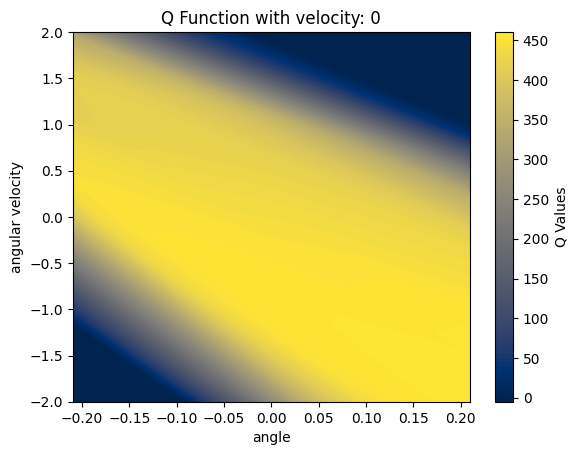

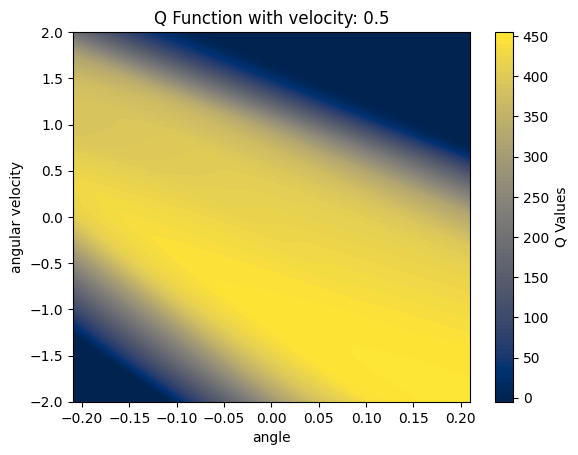

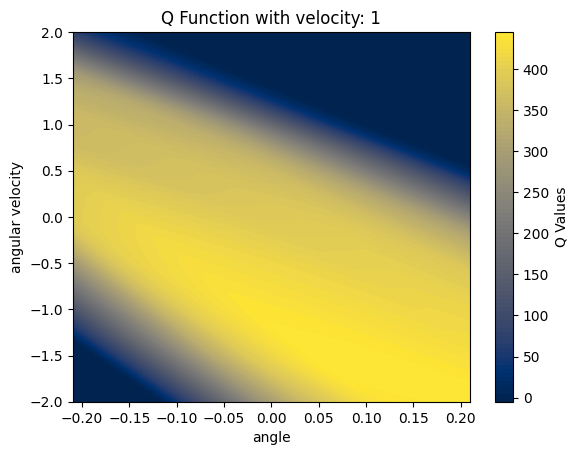

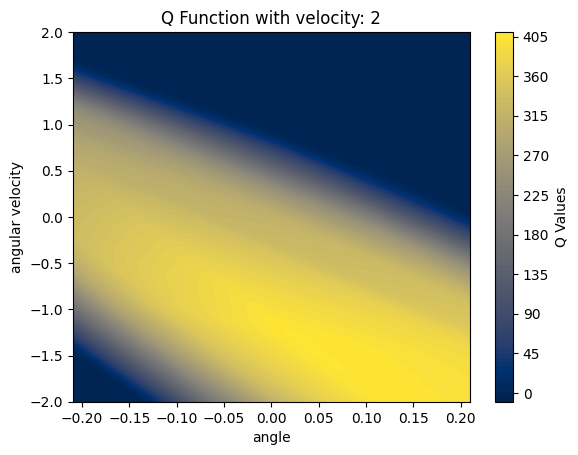

In [7]:
policy_net = optimised_policy_network  
q = True    # whether q values or greedy policy is visualised

angle_range = .2095 # you may modify this range
omega_range = 2     # you may modify this range

angle_samples = 100
omega_samples = 100
angles = torch.linspace(angle_range, -angle_range, angle_samples)
omegas = torch.linspace(-omega_range, omega_range, omega_samples)

speed_value = [0, 0.5, 1, 2]

for speed in speed_value:
    greedy_q_array = torch.zeros((angle_samples, omega_samples))
    policy_array = torch.zeros((angle_samples, omega_samples))
    for i, angle in enumerate(angles):
        for j, omega in enumerate(omegas):
            state = torch.tensor([0., speed, angle, omega])
            with torch.no_grad():
                q_vals = policy_net(state)
                greedy_action = q_vals.argmax()
                greedy_q_array[i, j] = q_vals[greedy_action]
                policy_array[i, j] = greedy_action
    if q:
        plt.contourf(angles, omegas, greedy_q_array.T, cmap='cividis', levels=100)
        plt.colorbar(label='Q Values')  # Add colorbar legend for Q values
    else:
        contours = plt.contourf(angles, omegas, policy_array.T, cmap='cividis')
    
    plt.xlabel("angle")
    plt.ylabel("angular velocity")
    plt.title(f"Q Function with velocity: {speed}")

    plt.show()